In [1]:
using DataFrames
using DataStructures
using StatsPlots
using Distributions
using Interpolations
include("../../ThinkBayes.jl/src/ThinkBayes.jl")
using .ThinkBayes

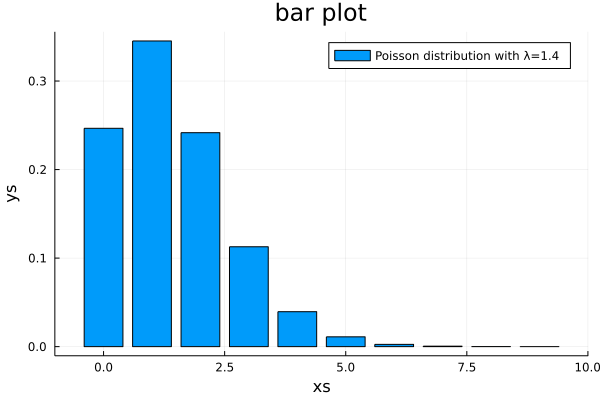

In [2]:
lambda = 1.4
goals = 0:9
pmf_goals = make_poisson_pmf(lambda, goals)
bar(pmf_goals, label="Poisson distribution with λ=1.4")

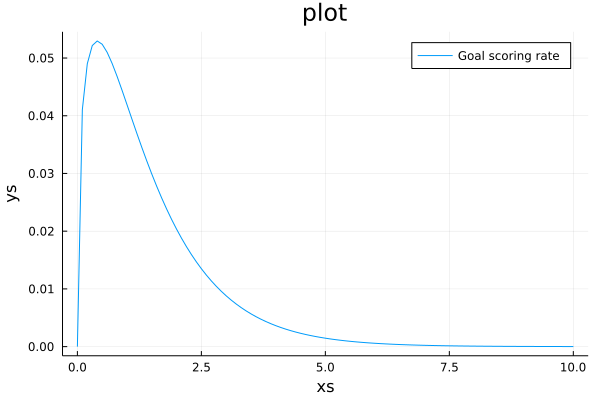

In [3]:
alpha = 1.4
vals = [x for x in 0:0.1:10]
g = Gamma(alpha)
ps = [pdf(g, v) for v in vals];
prior = pmf_from_seq(vals, normalize(ps))
plot(prior, label="Goal scoring rate")

In [4]:
mean(prior)

1.4140818156118378

## The Update

In [5]:
lamda = 1.4
p = Poisson(lamda)
k = 4
pdf(p, k)


0.039471954028253146

In [6]:
lambdas = values(prior)
k = 4
likelihood = [pdf(Poisson(lambda), k) for lambda in lambdas];

In [7]:
france = copy(prior)
france = update_poisson(france, 4);

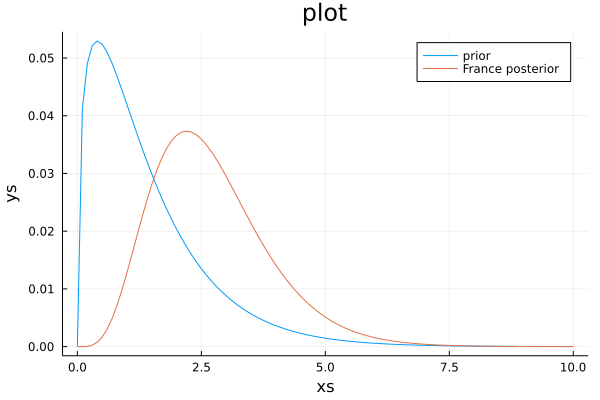

In [8]:
plot(prior, label="prior")
plot!(france, label="France posterior")

In [9]:
croatia = copy(prior)
croatia = update_poisson(croatia, 2)

101×2 DataFrame
 Row │ Values   Probs      
     │ Float64  Float64    
─────┼─────────────────────
   1 │     0.0  0.0
   2 │     0.1  0.00115411
   3 │     0.2  0.00498724
   4 │     0.3  0.0108049
   5 │     0.4  0.0176447
   6 │     0.5  0.0246797
   7 │     0.6  0.031298
   8 │     0.7  0.0370962
  ⋮  │    ⋮         ⋮
  95 │     9.4  5.24659e-7
  96 │     9.5  4.40603e-7
  97 │     9.6  3.69916e-7
  98 │     9.7  3.10489e-7
  99 │     9.8  2.60542e-7
 100 │     9.9  2.18575e-7
 101 │    10.0  1.83323e-7
            86 rows omitted

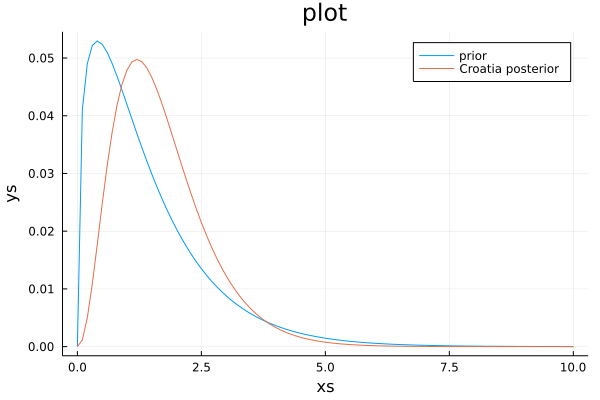

In [10]:
plot(prior, label="prior")
plot!(croatia, label="Croatia posterior")

In [11]:
mean(croatia), mean(france)

(1.6999765866755225, 2.6997723933423083)

In [12]:
prob_gt(croatia, france)

0.227269921368797

In [13]:
goals

0:9

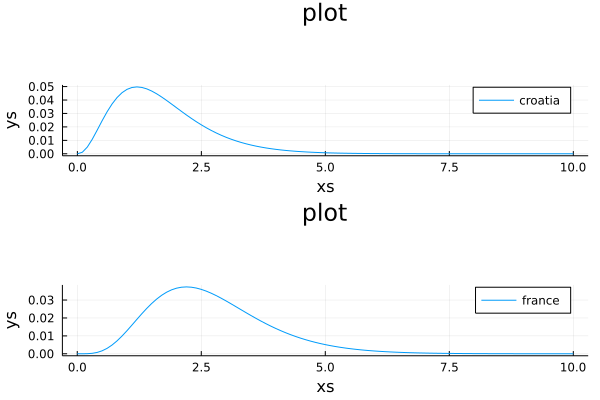

In [14]:
plot(plot(croatia,label="croatia"), plot(france, label="france"), layout=(2,1))

## Predicting the Rematch

In [15]:
pmf_seq=[make_poisson_pmf(lambda, goals) for lambda in values(prior)];

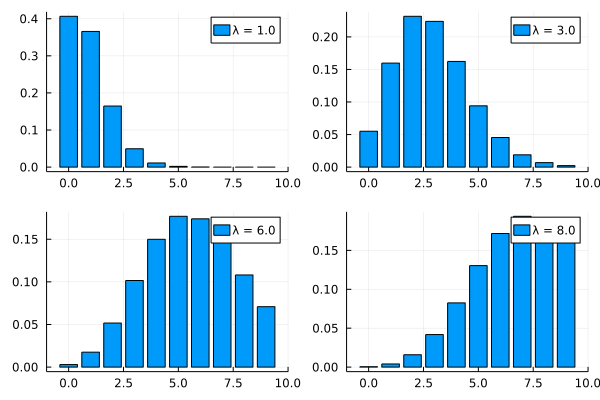

In [16]:
sample = [10, 30, 60, 80]
sample_len = length(sample)
xs = values(pmf_seq[1])
xlen = length(xs)
ps = reshape(reduce(vcat, ([probs(pmf_seq[x]) for x in sample])), xlen, sample_len)
titles = reshape(["λ = "*string(x/10.0) for x in sample], 1, 4)
bar(xs, ps, label=titles, layout=(2,2))


In [17]:
pred_france = make_mixture(france, pmf_seq);

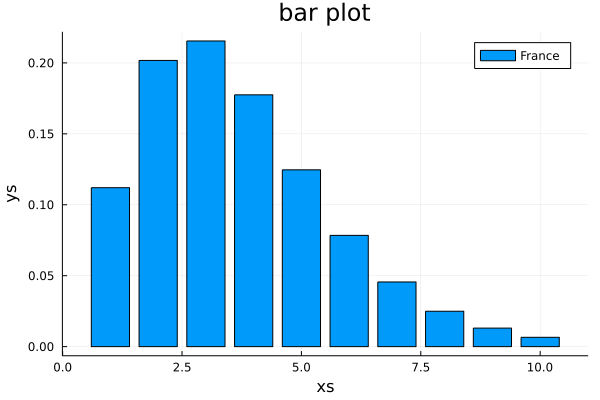

In [18]:
bar(pred_france, label="France")

In [19]:
pred_croatia = make_mixture(croatia, pmf_seq);

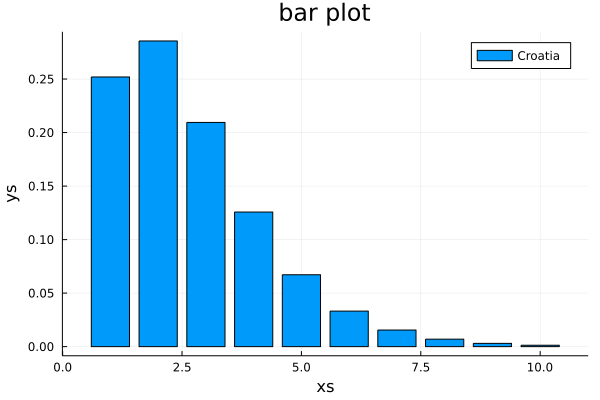

In [20]:
bar(pred_croatia, label="Croatia")

In [21]:
win = prob_gt(pred_france, pred_croatia)

0.5703522415934519

In [22]:
lose = prob_lt(pred_france, pred_croatia)

0.2644337625723588

In [23]:
tie = prob_eq(pred_france, pred_croatia)

0.1652139958341894

In [24]:
win + tie/2

0.6529592395105466

## The Exponential Distribution

In [25]:
e = Exponential(1/2)

Exponential{Float64}(θ=0.5)

In [26]:
pdf(e, 1)

0.2706705664732254

In [27]:
exp(-2 * 1)*2

0.2706705664732254

In [28]:
λ = 1.4
qs = [x for x in range(0, 4, 101)]
pmf_time = make_exponential_pmf(λ, qs);

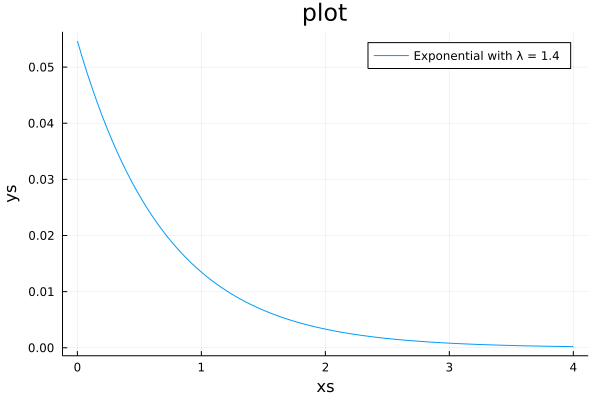

In [29]:
plot(pmf_time, label="Exponential with λ = 1.4")

## Exercises

_exercise 8.1_

In [30]:
function update_expo(pmf, data)
    t = data / 90
    lambdas = values(pmf)
    likelihood = expo_pdf(lambdas, t)
    pmf *= likelihood
end

update_expo (generic function with 1 method)

In [31]:
germany = update_expo(prior, 11)
germany2 = update_expo(germany, 12);

In [32]:
mean(germany), mean(germany2)

(2.1358882653086897, 2.7030590349263646)

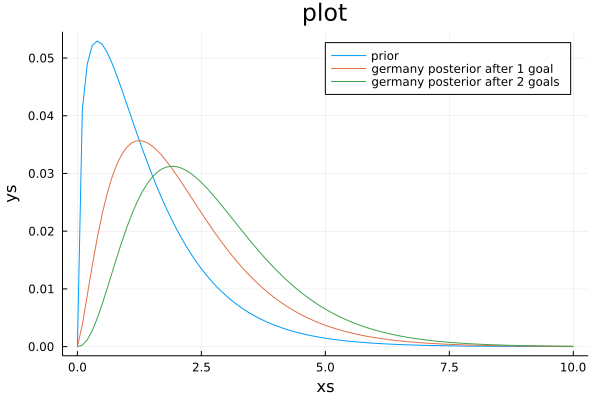

In [33]:
plot(prior, label="prior")
plot!(germany, label="germany posterior after 1 goal")
plot!(germany2, label="germany posterior after 2 goals")

In [34]:
goals

0:9

In [35]:
t = (90 - 23) / 90
pmf_seq = [make_poisson_pmf(λ*t, goals) for λ in values(germany2)];

In [36]:
pred_germany2 = make_mixture(germany2, pmf_seq);

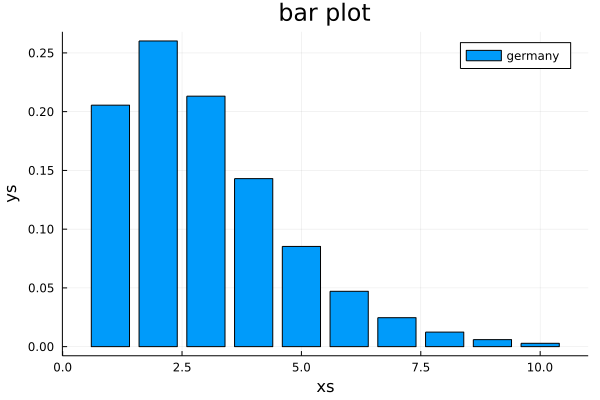

In [37]:
bar(pred_germany2, label="germany")

In [38]:
pdf(pred_germany2, 5)

0.08530181369884911

In [39]:
prob_ge(pred_germany2, 5)

0.1781638149271945

_exercise 7.2_

In [40]:
pmf_seq = [make_exponential_pmf(λ, 4.0) for λ in values(prior)];
length(pmf_seq)

101

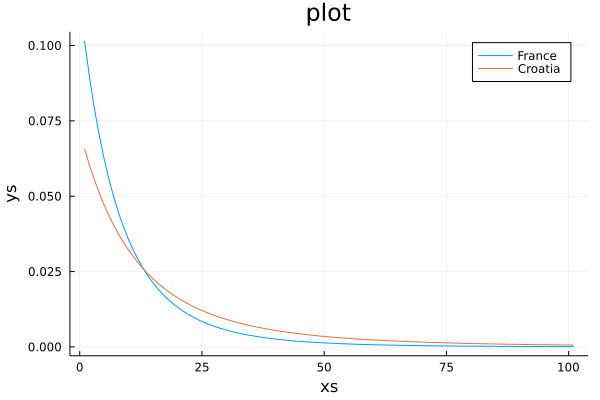

In [41]:
pred_france = make_mixture(france, pmf_seq)
pred_croatia = make_mixture(croatia, pmf_seq)
plot(pred_france, label="France")
plot!(pred_croatia, label="Croatia")

In [42]:
prob_lt(pred_france, pred_croatia)

0.5904596116867544

_exercise 7.3_

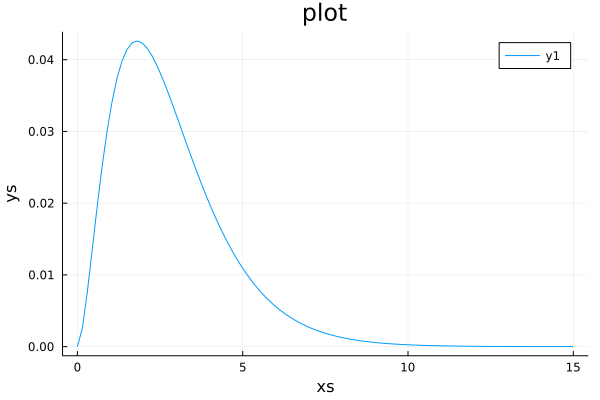

In [43]:
λ = 2.8
prior = make_gamma_pmf(λ, 15)
plot(prior)

In [44]:
mean(prior)

2.7997400090376576

In [45]:
bruins = copy(prior)
bruins_scores = [0, 2, 8, 4]
for d in bruins_scores
    bruins = update_poisson(bruins, d)
end
mean(bruins)

3.3599999999999977

In [46]:
canucks = copy(prior)
canucks_scores = [1, 3, 1, 0]
for d in canucks_scores
    canucks = update_poisson(canucks, d)
end
mean(canucks)

1.5599999606443669

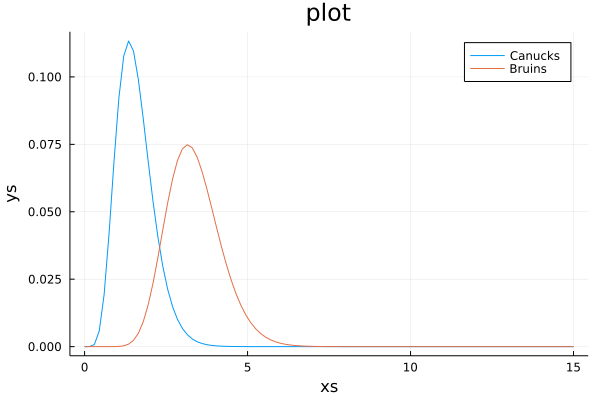

In [47]:
plot(canucks, label="Canucks")
plot!(bruins, label="Bruins")

In [48]:
goals = [x for x in 0:14]
pmf_seq = [make_poisson_pmf(λ, goals) for λ in values(bruins)];

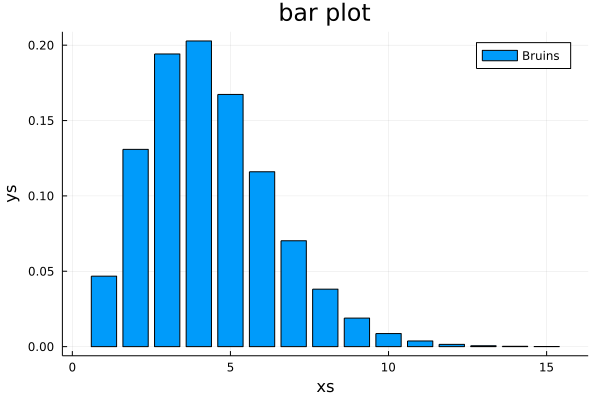

In [49]:
pred_bruins = make_mixture(bruins, pmf_seq)
bar(pred_bruins, label="Bruins")

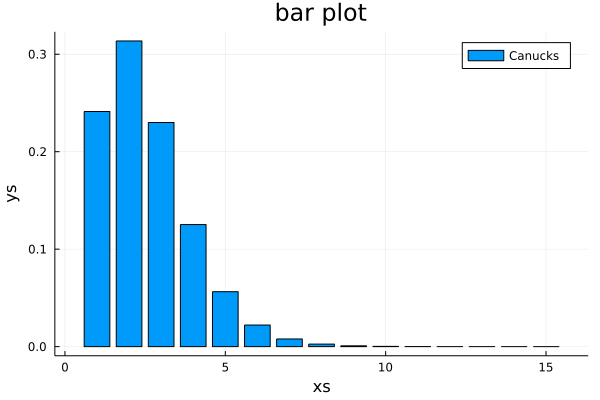

In [50]:
pred_canucks = make_mixture(canucks, pmf_seq)
bar(pred_canucks, label="Canucks")

In [51]:
win = prob_gt(pred_bruins, pred_canucks)
lose = prob_lt(pred_bruins, pred_canucks)
tie = prob_eq(pred_bruins, pred_canucks)

(win, lose, tie)

(0.7038631514645926, 0.16111690750716465, 0.13501994102824277)

In [52]:
p = win + tie/2
p

0.7713731219787139

In [55]:
sum(binom_pmf([2, 3], 3, p))

0.8670900197850087